<a href="https://colab.research.google.com/github/abdulgaffarshaik/infosys-internship/blob/master/pythontask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk tensorflow

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Load Dummy Dataset (simulate NSL-KDD like data)
# ----------------------------
np.random.seed(42)
df = pd.DataFrame({
    "src_bytes": np.random.randint(0, 5000, 200),
    "dst_bytes": np.random.randint(0, 7000, 200),
    "num_failed_logins": np.random.randint(0, 10, 200),
})

In [8]:
# Introduce duplicates & missing values
df = pd.concat([df, df.iloc[:5]], ignore_index=True)
df.loc[3, "src_bytes"] = np.nan

# ----------------------------
# 1. Remove duplicate log entries
# ----------------------------
df = df.drop_duplicates()
display(df.head(10))  # shows cleaned table


,src_bytes,dst_bytes,num_failed_logins
0,860.0,1734,5
1,3772.0,1843,9
2,3092.0,488,9
3,NaN,2976,5
4,4426.0,1959,0
5,3444.0,5759,3
6,3171.0,6694,9
7,2919.0,2385,5
8,130.0,2919,5
9,1685.0,4736,4


In [9]:
# 2. Handle missing values (median)
# ----------------------------
df = df.fillna(df.median(numeric_only=True))
display(df.head(10))

,src_bytes,dst_bytes,num_failed_logins
0,860.0,1734,5
1,3772.0,1843,9
2,3092.0,488,9
3,2590.0,2976,5
4,4426.0,1959,0
5,3444.0,5759,3
6,3171.0,6694,9
7,2919.0,2385,5
8,130.0,2919,5
9,1685.0,4736,4


In [10]:
# 3. Normalize IP addresses (simulated)
# ----------------------------
df["ip_address"] = ["192.168.1."+str(i%255) for i in range(len(df))]
df["ip_address"] = df["ip_address"].apply(lambda x: ".".join([str(int(o)) for o in x.split(".")]))
display(df[["ip_address"]].head(10))

,ip_address
0,192.168.1.0
1,192.168.1.1
2,192.168.1.2
3,192.168.1.3
4,192.168.1.4
5,192.168.1.5
6,192.168.1.6
7,192.168.1.7
8,192.168.1.8
9,192.168.1.9


In [11]:
# 4. Filter corrupted records (negative values)
# ----------------------------
df = df[(df["src_bytes"] >= 0) & (df["dst_bytes"] >= 0)]
display(df.head(10))

,src_bytes,dst_bytes,num_failed_logins,ip_address
0,860.0,1734,5,192.168.1.0
1,3772.0,1843,9,192.168.1.1
2,3092.0,488,9,192.168.1.2
3,2590.0,2976,5,192.168.1.3
4,4426.0,1959,0,192.168.1.4
5,3444.0,5759,3,192.168.1.5
6,3171.0,6694,9,192.168.1.6
7,2919.0,2385,5,192.168.1.7
8,130.0,2919,5,192.168.1.8
9,1685.0,4736,4,192.168.1.9


In [12]:
# 5. Standardize timestamp formats
# ----------------------------
df["timestamp"] = pd.date_range(start="2023-01-01", periods=len(df), freq="T")
display(df[["timestamp"]].head(10))

/tmp/ipython-input-1480968890.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df["timestamp"] = pd.date_range(start="2023-01-01", periods=len(df), freq="T")


,timestamp
0,2023-01-01 00:00:00
1,2023-01-01 00:01:00
2,2023-01-01 00:02:00
3,2023-01-01 00:03:00
4,2023-01-01 00:04:00
5,2023-01-01 00:05:00
6,2023-01-01 00:06:00
7,2023-01-01 00:07:00
8,2023-01-01 00:08:00
9,2023-01-01 00:09:00


In [14]:
# 6. Clean threat text
# ----------------------------
df["threat_text"] = ["Suspicious malicious attack attempt!!!"] * len(df)
df["threat_text_clean"] = df["threat_text"].str.replace(r"[^a-zA-Z ]", "", regex=True).str.lower()
display(df[["threat_text", "threat_text_clean"]].head(5))

,threat_text,threat_text_clean
0,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
1,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
2,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
3,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
4,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt


In [15]:
# 7. Remove outliers (IQR on failed logins)
# ----------------------------
Q1, Q3 = df["num_failed_logins"].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[~((df["num_failed_logins"] < (Q1 - 1.5*IQR)) | (df["num_failed_logins"] > (Q3 + 1.5*IQR)))]
display(df.head(10))

,src_bytes,dst_bytes,num_failed_logins,ip_address,timestamp,threat_text,threat_text_clean
0,860.0,1734,5,192.168.1.0,2023-01-01 00:00:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
1,3772.0,1843,9,192.168.1.1,2023-01-01 00:01:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
2,3092.0,488,9,192.168.1.2,2023-01-01 00:02:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
3,2590.0,2976,5,192.168.1.3,2023-01-01 00:03:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
4,4426.0,1959,0,192.168.1.4,2023-01-01 00:04:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
5,3444.0,5759,3,192.168.1.5,2023-01-01 00:05:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
6,3171.0,6694,9,192.168.1.6,2023-01-01 00:06:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
7,2919.0,2385,5,192.168.1.7,2023-01-01 00:07:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
8,130.0,2919,5,192.168.1.8,2023-01-01 00:08:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt
9,1685.0,4736,4,192.168.1.9,2023-01-01 00:09:00,Suspicious malicious attack attempt!!!,suspicious malicious attack attempt


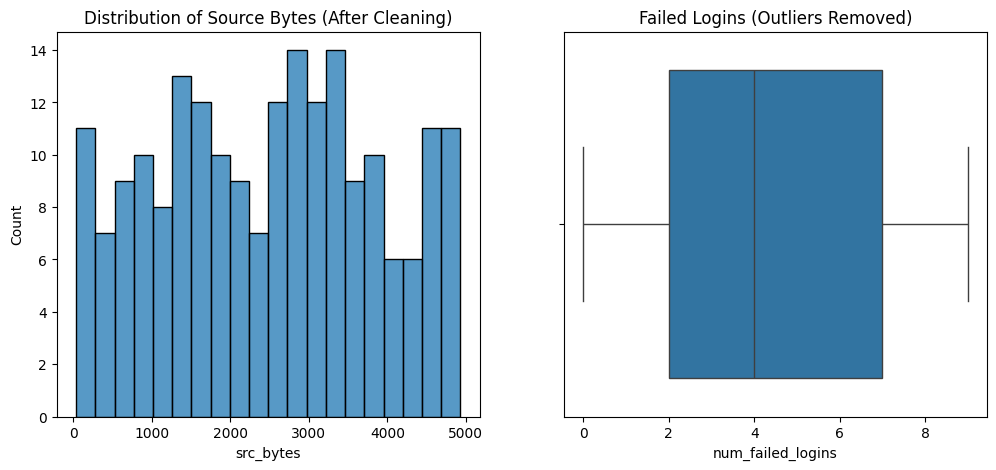

In [16]:
# Visualization for cleaning process
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df["src_bytes"], bins=20, ax=axes[0])
axes[0].set_title("Distribution of Source Bytes (After Cleaning)")

sns.boxplot(x=df["num_failed_logins"], ax=axes[1])
axes[1].set_title("Failed Logins (Outliers Removed)")

plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# (Reusing cleaned df from Data Cleaning step)
# If running standalone, create dummy df:
np.random.seed(42)
df = pd.DataFrame({
    "user": np.random.choice(["alice","bob","charlie","david"], 200),
    "attack_type": np.random.choice(["DoS","Probe","R2L","U2R"], 200),
    "country": np.random.choice(["US","CN","RU","IN","BR"], 200),
    "src_bytes": np.random.randint(0, 5000, 200),
    "dst_bytes": np.random.randint(0, 7000, 200),
    "num_failed_logins": np.random.randint(0, 10, 200),
    "num_success_logins": np.random.randint(0, 20, 200),
    "port": np.random.choice([21,22,23,25,80,443,3389], 200),
    "ip_address": ["192.168.1."+str(i%255) for i in range(200)]
})

,num_failed_logins,num_success_logins
user,,
alice,222,454
bob,200,351
charlie,242,523
david,218,546


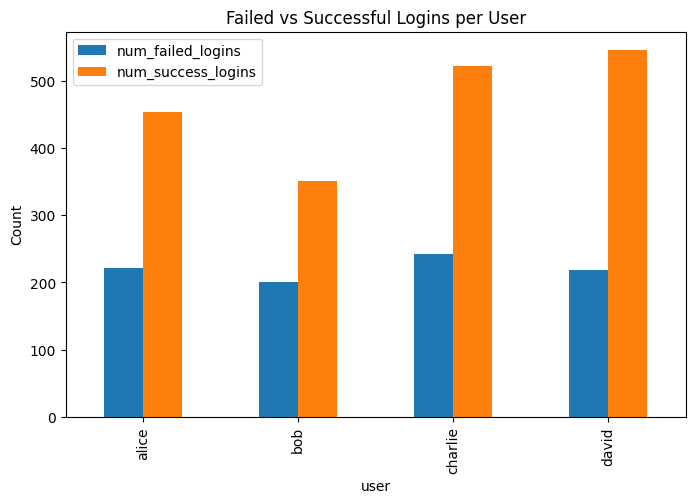

In [19]:
# 8. Count failed vs successful login attempts per user
login_counts = df.groupby("user")[["num_failed_logins","num_success_logins"]].sum()
display(login_counts)

login_counts.plot(kind="bar", figsize=(8,5))
plt.title("Failed vs Successful Logins per User")
plt.ylabel("Count")
plt.show()

,count
attack_type,
U2R,61
R2L,50
DoS,49
Probe,40


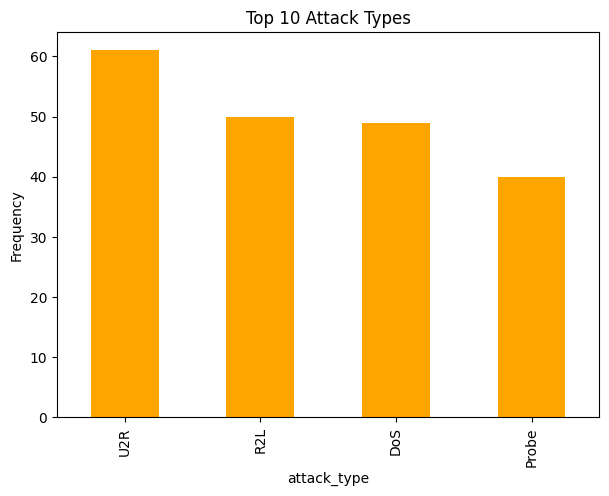

In [20]:
# 9. Top 10 most frequent attack types
attack_counts = df["attack_type"].value_counts().head(10)
display(attack_counts)

attack_counts.plot(kind="bar", color="orange", figsize=(7,5))
plt.title("Top 10 Attack Types")
plt.ylabel("Frequency")
plt.show()

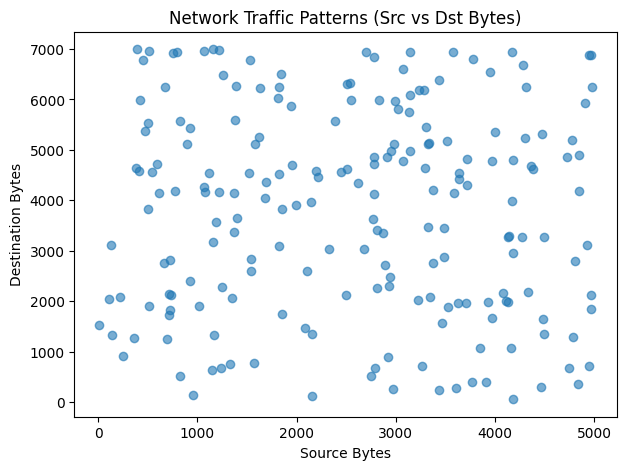

In [21]:
# 10. Visualize network traffic patterns
plt.figure(figsize=(7,5))
plt.scatter(df["src_bytes"], df["dst_bytes"], alpha=0.6)
plt.title("Network Traffic Patterns (Src vs Dst Bytes)")
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.show()

,user,num_failed_logins,anomaly_score
0,charlie,0,-1.591290
1,david,3,-0.508780
2,alice,8,1.295404
3,charlie,3,-0.508780
4,charlie,9,1.656241
5,david,2,-0.869617
6,alice,8,1.295404
7,alice,1,-1.230454
8,charlie,3,-0.508780
9,bob,5,0.212894


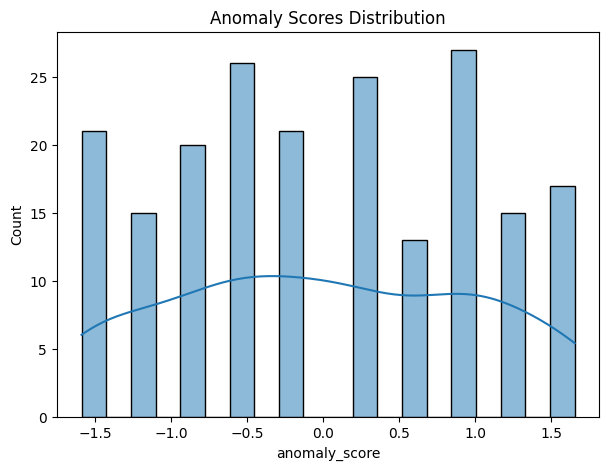

In [22]:
# 11. Calculate anomaly scores (simple z-score for failed logins)
df["anomaly_score"] = (df["num_failed_logins"] - df["num_failed_logins"].mean()) / df["num_failed_logins"].std()
display(df[["user","num_failed_logins","anomaly_score"]].head(10))

plt.figure(figsize=(7,5))
sns.histplot(df["anomaly_score"], bins=20, kde=True)
plt.title("Anomaly Scores Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


,ip_address,access_count,cluster
0,192.168.1.0,1,0
1,192.168.1.1,1,0
2,192.168.1.2,1,0
3,192.168.1.3,1,0
4,192.168.1.4,1,0
5,192.168.1.5,1,0
6,192.168.1.6,1,0
7,192.168.1.7,1,0
8,192.168.1.8,1,0
9,192.168.1.9,1,0


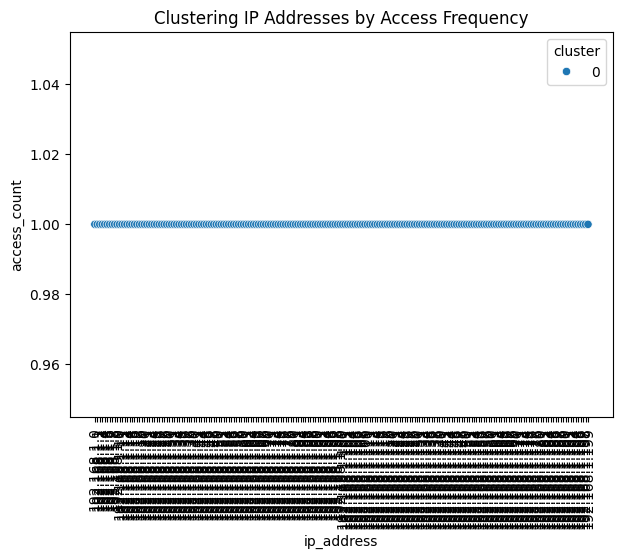

In [23]:
# 12. Cluster IP addresses based on access frequency (KMeans)
from sklearn.cluster import KMeans
ip_counts = df["ip_address"].value_counts().reset_index()
ip_counts.columns = ["ip_address","access_count"]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
ip_counts["cluster"] = kmeans.fit_predict(ip_counts[["access_count"]])
display(ip_counts.head(10))

plt.figure(figsize=(7,5))
sns.scatterplot(data=ip_counts, x="ip_address", y="access_count", hue="cluster", palette="tab10")
plt.xticks(rotation=90)
plt.title("Clustering IP Addresses by Access Frequency")
plt.show()

,count
port,
21,33
3389,32
22,30
80,29
23,29
443,24
25,23


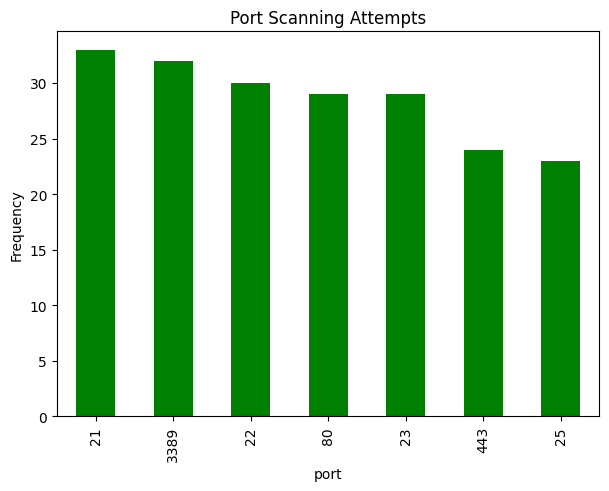

In [24]:
# 13. Analyze port scanning attempts
port_counts = df["port"].value_counts()
display(port_counts)

port_counts.plot(kind="bar", figsize=(7,5), color="green")
plt.title("Port Scanning Attempts")
plt.ylabel("Frequency")
plt.show()

country,BR,CN,IN,RU,US
attack_type,,,,,
DoS,13,10,6,8,12
Probe,6,6,9,9,10
R2L,10,9,15,7,9
U2R,13,16,14,9,9


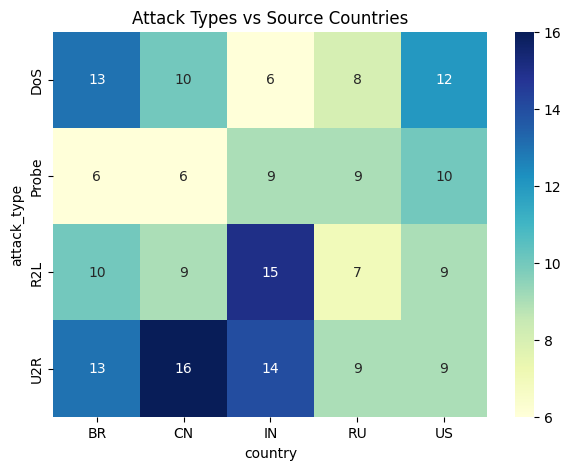

In [25]:
# 14. Correlation between attack type and source country
attack_country = pd.crosstab(df["attack_type"], df["country"])
display(attack_country)

plt.figure(figsize=(7,5))
sns.heatmap(attack_country, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Attack Types vs Source Countries")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Prepare dataset for ML
# ---------------------------
df_pred = df.copy()
df_pred["label"] = np.random.choice([0,1], len(df_pred))  # 0=benign, 1=malicious

X = df_pred[["src_bytes","dst_bytes","num_failed_logins","num_success_logins"]]
y = df_pred["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        30
           1       0.55      0.60      0.57        30

    accuracy                           0.55        60
   macro avg       0.55      0.55      0.55        60
weighted avg       0.55      0.55      0.55        60



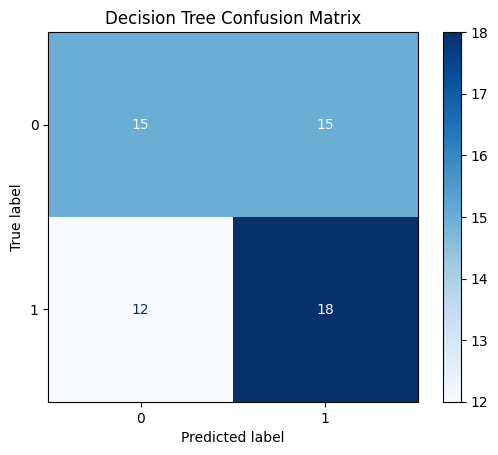

In [27]:
# 15. Train ML model (Decision Tree or RF for intrusion prediction)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        30
           1       0.59      0.43      0.50        30

    accuracy                           0.57        60
   macro avg       0.57      0.57      0.56        60
weighted avg       0.57      0.57      0.56        60



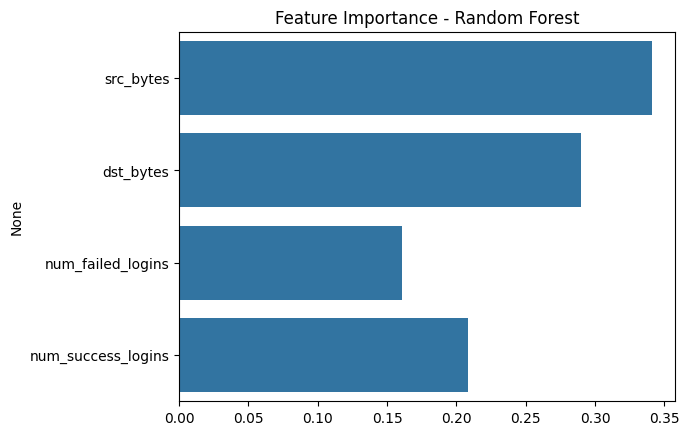

In [28]:
# 16. Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

importances = rf.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance - Random Forest")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.5136 - loss: 0.6924 - val_accuracy: 0.5833 - val_loss: 0.6920
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5629 - loss: 0.6916 - val_accuracy: 0.4833 - val_loss: 0.6922
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5533 - loss: 0.6909 - val_accuracy: 0.4833 - val_loss: 0.6921


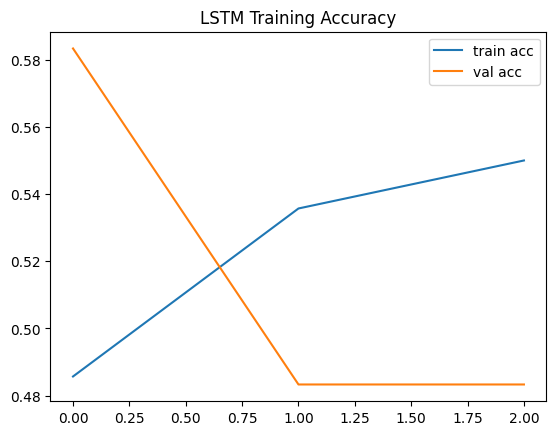

In [29]:
# 17. LSTM for attack forecasting
# Simulate sequential data
seq_X = np.array(X_scaled).reshape(len(X_scaled), 4, 1)

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(seq_X, y, test_size=0.3, random_state=42)

lstm_model = models.Sequential([
    layers.LSTM(32, input_shape=(4,1)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = lstm_model.fit(X_train_seq, y_train_seq, epochs=3, batch_size=16, validation_data=(X_test_seq, y_test_seq), verbose=1)

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("LSTM Training Accuracy")
plt.show()

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.47      0.63      0.54        30
           1       0.45      0.30      0.36        30

    accuracy                           0.47        60
   macro avg       0.46      0.47      0.45        60
weighted avg       0.46      0.47      0.45        60



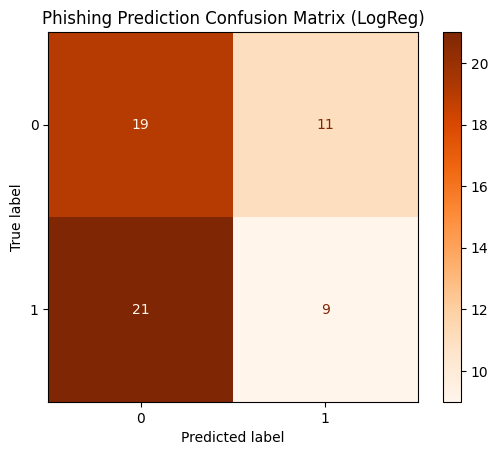

In [30]:
# 18. Predict phishing attempts (simulate with Logistic Regression)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="Oranges")
plt.title("Phishing Prediction Confusion Matrix (LogReg)")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier Report
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        30
           1       0.61      0.57      0.59        30

    accuracy                           0.60        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.60      0.60      0.60        60



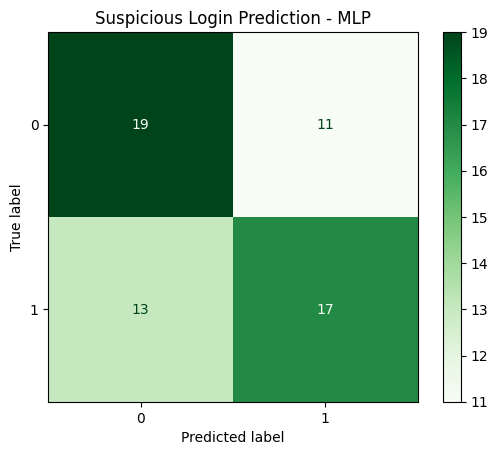

In [31]:
# 19. Suspicious login attempts (MLP Classifier)
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP Classifier Report")
print(classification_report(y_test, y_pred_mlp))

ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, cmap="Greens")
plt.title("Suspicious Login Prediction - MLP")
plt.show()

,src_bytes,dst_bytes,num_failed_logins,iso_pred
0,3913,404,0,1
1,1066,6966,3,0
2,4380,4613,8,0
3,2444,4571,3,0
4,4107,2000,9,0
5,3373,2756,2,0
6,3969,1668,8,0
7,2546,5989,1,0
8,753,6914,3,0
9,2082,1460,5,0


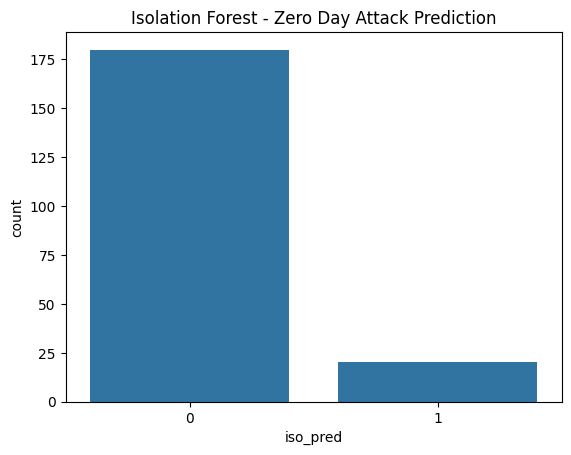

In [32]:
# 20. Anomaly detection (zero-day prediction) with IsolationForest
iso = IsolationForest(contamination=0.1, random_state=42)
iso_preds = iso.fit_predict(X_scaled)
iso_preds = np.where(iso_preds == -1, 1, 0)  # -1 = anomaly -> 1 (malicious)

df_pred["iso_pred"] = iso_preds
display(df_pred[["src_bytes","dst_bytes","num_failed_logins","iso_pred"]].head(10))

sns.countplot(x=df_pred["iso_pred"])
plt.title("Isolation Forest - Zero Day Attack Prediction")
plt.show()